#### MAL1-A23 Group 9 Project
Members: Maxim Zavidei (304321), Yoana Miteva (304132)<br/>
Dataset: GTSRB - German Traffic Sign Recognition Benchmark, [Link](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data) 

#### Description of the dataset:
The chosen dataset of the project is the German Traffic Sign Recognition Benchmark which contains a lot of samples of different categories of traffic signs. It contains 43 different types of traffic signs.

In order to make the group project more interesting the group went outside VIA and have collected images placed on the surrounding streets. And later in the project after training the model will use the collected pictures to see how well the model performs.

The second set of images can be found under the folder outside_images.

In [ ]:
from cProfile import label
import cv2
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [24]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

In [25]:
# Load the data
data_dir = './gtsrb'

images = []
labels = []
for i in range(NUM_CATEGORIES):
    for filename in os.listdir(os.path.join(data_dir, str(i))):
        file_path = os.path.join(os.path.join(data_dir, str(i)), filename)
        img = cv2.imread(file_path)
        if img is not None:
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img)
            labels.append(i)

In [26]:
# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

"""
Returns a compiled convolutional neural network model. Assume that the
`input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
The output layer should have `NUM_CATEGORIES` units, one for each category.
"""
model = tf.keras.models.Sequential([
        
tf.keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),

tf.keras.layers.Conv2D(32, 3, activation="relu"),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

tf.keras.layers.Conv2D(32, 3, activation="relu"),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [27]:
# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/15
500/500 [==============================] - 3s 6ms/step - loss: 3.0020 - accuracy: 0.3356
Epoch 2/15
500/500 [==============================] - 3s 6ms/step - loss: 1.1800 - accuracy: 0.6510
Epoch 3/15
500/500 [==============================] - 3s 6ms/step - loss: 0.7462 - accuracy: 0.7700
Epoch 4/15
500/500 [==============================] - 3s 6ms/step - loss: 0.5445 - accuracy: 0.8298
Epoch 5/15
500/500 [==============================] - 3s 6ms/step - loss: 0.4475 - accuracy: 0.8587
Epoch 6/15
500/500 [==============================] - 3s 6ms/step - loss: 0.3723 - accuracy: 0.8848
Epoch 7/15
500/500 [==============================] - 3s 6ms/step - loss: 0.3404 - accuracy: 0.8961
Epoch 8/15
500/500 [==============================] - 3s 6ms/step - loss: 0.3079 - accuracy: 0.9079
Epoch 9/15
500/500 [==============================] - 3s 6ms/step - loss: 0.2703 - accuracy: 0.9175
Epoch 10/15
500/500 [==============================] - 3s 6ms/step - loss: 0.2408 - accuracy: 0.9272

[0.1402382105588913, 0.9653716087341309]

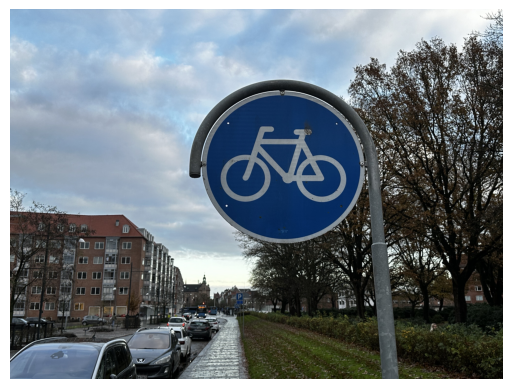

In [28]:
import matplotlib.pyplot as plt
import cv2

def display_image(image_path):
    """
    Displays an image in a Jupyter notebook.
    """
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    # Convert from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

image_path = 'outside_images/IMG_0629_RAW.jpg'
display_image(image_path)

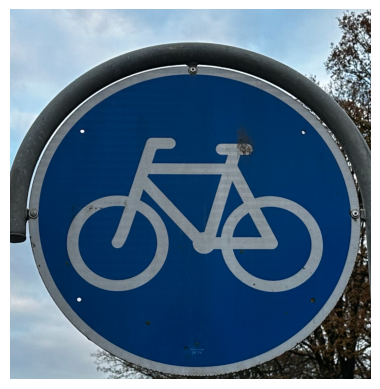

In [29]:
# Example usage
image_path = 'outside_images/IMG_0629_CROPPED.png'  # Replace with your image path
display_image(image_path)

In [30]:
import cv2
import numpy as np

def load_and_preprocess_image(image_path):
    """
    Loads an image from a given path and preprocesses it to fit the model.
    """
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return img

def predict_category(image_path, model):
    """
    Predicts the category of the image at the given path.
    """
    img = load_and_preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_category = np.argmax(predictions)
    return predicted_category

image_path = 'outside_images/IMG_0629_CROPPED.png'
predicted_category = predict_category(image_path, model)
print(f"The predicted category is: {predicted_category}")


1/1 [==============================] - 0s 34ms/step
The predicted category is: 33


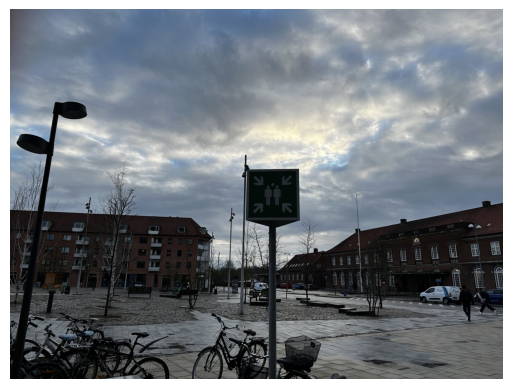

In [31]:
image_path = 'outside_images/IMG_0623.jpg'
display_image(image_path)

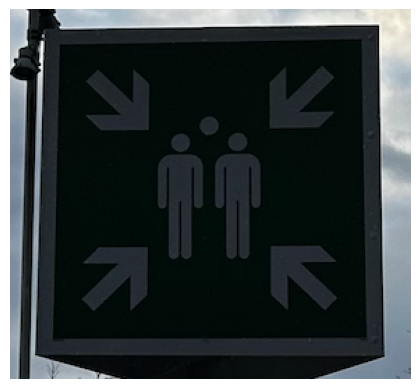

1/1 [==============================] - 0s 11ms/step
The predicted category is: 13


In [32]:
image_path = 'outside_images/IMG_0623_CROPPED.png'
display_image(image_path)

predicted_category = predict_category(image_path, model)
print(f"The predicted category is: {predicted_category}")

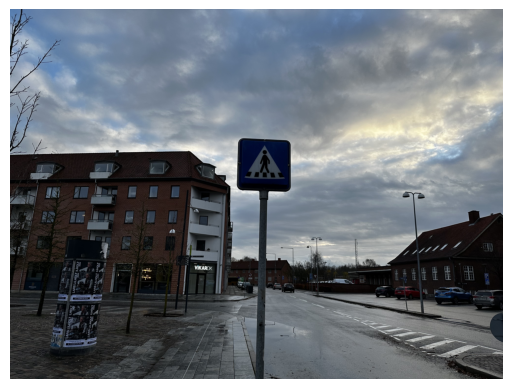

In [22]:
image_path = 'outside_images/IMG_0624.jpg'
display_image(image_path)

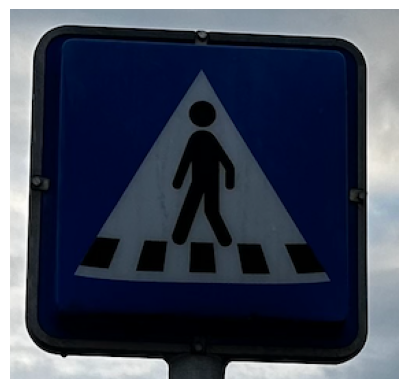

1/1 [==============================] - 0s 12ms/step
The predicted category is: 30


In [33]:
image_path = 'outside_images/IMG_0624_CROPPED.png'
display_image(image_path)

predicted_category = predict_category(image_path, model)
print(f"The predicted category is: {predicted_category}")

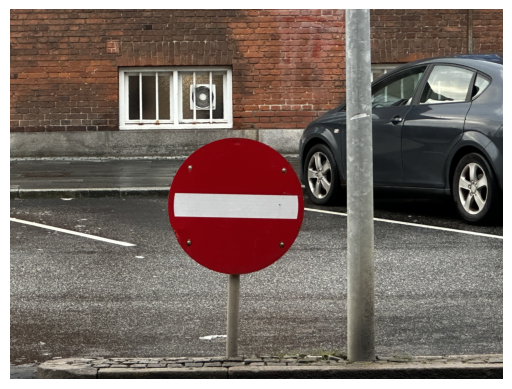

In [34]:
image_path = 'outside_images/IMG_0636.jpg'
display_image(image_path)

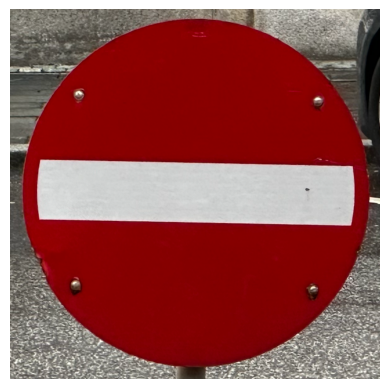

1/1 [==============================] - 0s 11ms/step
The predicted category is: 17


In [35]:
image_path = 'outside_images/IMG_0636_CROPPED.png'
display_image(image_path)

predicted_category = predict_category(image_path, model)
print(f"The predicted category is: {predicted_category}")